In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# 파라미터 설정 (실험을 통해 구해야 하는 값)
learning_rate = 0.01 # 학습률
epochs = 1000 # 학습횟수
step_display = 50 # 진행 상태를 출력할 단계


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# 회귀분석 : 전기생산량과 소비량
# 월별 전기생산금액 (억원)
x =[3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]
# 월별 전기 사용량 (백만 kwh)
y =[2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]


In [3]:
# 가중치(weight)와 절편(bias)
# tf.random_uniform( [1] 변수의 형태, -1.0 최소값, 1.0 최대값) 무작위수 초기화
# -1.0 ~ 1.0 사이의 값 생성
# name: 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙임
weight = tf.Variable(tf.random_uniform([1],-1.0,1.0), name="weight")
bias=tf.Variable(tf.random_uniform([1],-1.0,1.0), name="bias")

In [4]:
# placeholder : 학습용 데이터를 담는 그릇
# 그래프에서 x(입력값)을 저장하는 저장소
# placeholder(dtype, shape, name) : 자료형, 행렬의 차원, placeholder의 이름
# 그래프를 구축할 때는 메모리에 저장하지 않고 그래프를 실행할 때 피드하면서 메모리에 저장됨
X = tf.placeholder(dtype=tf.float32, name="X")
Y = tf.placeholder(dtype=tf.float32, name="Y")

In [5]:
# X와 Y의 상관 관계를 분석하기 위한 가설 수식 작성
# y = W * x + b
# W와 X가 행렬이 아니므로 tf.matmul이 아니라 기본 곱셈 사용


In [6]:
y_pred = tf.add(tf.multiply(weight, X), bias)
# 손실함수(비용함수) : 예측값과 실제값의 거리를 계산하는 함수
cost = tf.reduce_mean(tf.square(y_pred - Y))
# 비용을 최소화시킴
# AdamOptimizer : 현재 가장 성능이 좋은 알고리즘
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [7]:
#변수 초기화
init = tf.global_variables_initializer()
#세션 생성 및 시작
sess = tf.Session()
sess.run(init)

In [8]:
# optimizer와 cost를 그래프에서 계산
# 계산을 위해 필요한 값은 feed_dict을 통해 전달함
# placeholder인 x, y에 데이터를 계속 넣어줄 자료를 작성해줍니다
# cost 계산: 정해진 데이터셋에서 한 샘플씩 불러와서 cost를 계산
# optimizer 계산: cost로 부터 error를 계산 후, 
# 모델에 대한 편미분을 자동으로 계산해주는 과정을 이용하여 모델W, b를 수정
for epoch in range(epochs):
    _, cost_val = sess.run([optimizer,cost], feed_dict={X:x, Y:y})
    if (epoch+1) % step_display == 0:
        print("Epoch:{0}, cost:{1}, weight:{2}, bias:{3}".format(epoch+1,cost_val,sess.run(weight),sess.run(bias)))

Epoch:50, cost:6.691156387329102, weight:[-0.07759655], bias:[0.6299115]
Epoch:100, cost:1.1302565336227417, weight:[0.22975376], bias:[0.93687874]
Epoch:150, cost:0.12456444650888443, weight:[0.37693465], bias:[1.0832053]
Epoch:200, cost:0.030640432611107826, weight:[0.42636412], bias:[1.1313747]
Epoch:250, cost:0.026516033336520195, weight:[0.43770894], bias:[1.1411846]
Epoch:300, cost:0.026429610326886177, weight:[0.43958977], bias:[1.1413327]
Epoch:350, cost:0.026411935687065125, weight:[0.44007117], bias:[1.1399148]
Epoch:400, cost:0.02639322727918625, weight:[0.44048196], bias:[1.1382726]
Epoch:450, cost:0.026373350992798805, weight:[0.4409239], bias:[1.1365167]
Epoch:500, cost:0.026352420449256897, weight:[0.4413941], bias:[1.1346513]
Epoch:550, cost:0.026330476626753807, weight:[0.44189075], bias:[1.1326809]
Epoch:600, cost:0.026307642459869385, weight:[0.44241267], bias:[1.13061]
Epoch:650, cost:0.0262839887291193, weight:[0.44295895], bias:[1.128443]
Epoch:700, cost:0.0262595

In [9]:
training_cost = sess.run(cost, feed_dict={X:x, Y:y})
print(" 최종 cost:", cost_val)
print(" 정확도:", 100-cost_val)
print(" 최종 가중치:", sess.run(weight))
print(" 최종 절편:", sess.run(bias))

 최종 cost: 0.026101103
 정확도: 99.9738988969475
 최종 가중치: [0.44738767]
 최종 절편: [1.1108724]


In [10]:
# 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인
print("X: 5, Y:", sess.run(y_pred, feed_dict={X: 5}))
print("X: 2.5, Y:", sess.run(y_pred, feed_dict={X: 2.5}))

X: 5, Y: [3.3478107]
X: 2.5, Y: [2.2293415]


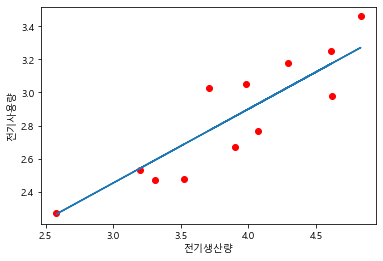

In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.plot(x,y,'ro') # red, o
plt.plot(x,sess.run(weight)*x+sess.run(bias))
plt.xlabel("전기생산량")
plt.ylabel("전기사용량")
plt.show()


In [12]:
#세션 종료
sess.close()